<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="oxDNA.png">
</center>

# <font color='black'>Table of contents<font><a class='anchor' id='top'></a>
- [Build and Run a oxDNA Simulation](#1)
- [Run Multiple Simulations in Parallel](#2)
- [Umbrella Sampling](#3)

<font size='6'><a class="anchor" id="1"></a> <h2 align="center"> <font color='black'>Build and Run an oxDNA Simulation.</font></h2> 

<font size='3'><font color='black'>The Simulation class acts as an interface to an oxDNA simulation. </font>


In [2]:
from umbrella_sampling import ComUmbrellaSampling, MeltingUmbrellaSampling
from oxdna_simulation import SimulationManager, Simulation, Observable
from wham_analysis import collect_coms
import os

<font size='3'><font color='black'>It takes the path to a directory containing inital dat and top files (file_dir) and the directory you want to run the simulation in (sim_dir) as its only arguments. </font>

In [54]:
path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/rro'
sim_dir = f'{file_dir}/single_rro_sim_1'

sim = Simulation(file_dir, sim_dir)

<font size='3'><font color='black'>We can easily build a simulation that meets the minimum requirments to run a simulation using the build method.</font>

In [4]:
sim.build(clean_build='force')

<font size='3'><font color='black'>And then begin the simulation in a child subprocess using the oxpy_run.run method.</font>

In [5]:
sim.oxpy_run.run()

Running: single_rro_sim_1


Run time: 4.259263647720218
Finished: single_rro_sim_1


<font size='3'><font color='black'> This will run an oxDNA simulation using default parameters for 1 billion steps at 20C.</font>

<div class="alert alert-block alert-info">
<b>Note:</b> We can terminate a simulation using the oxpy_run.process.terminate method.
</div>

In [6]:
sim.oxpy_run.process.terminate()

INFO: Lists updated 118 times (every ~209.949153 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.44 MB/s



<font size='3'><font color='black'> To run a simulation with modified input parameters use the input_file file method</font>

In [11]:
#use a dictornary as the argument to input file
sim.input_file({'steps':'1e4', 'T':'30C', 'print_energy_every': '1e4',
                'print_conf_interval':'1e4'})

[All oxDNA input parameters can be found in the documentation here.](https://lorenzo-rovigatti.github.io/oxDNA/input.html)

<div class="alert alert-block alert-info">
<b>Note:</b> The smaller the print_conf_interval the slower the simulation will run.
</div>

<font size='3'><font color='black'> Rerun with modifed parameters.</font>
    
<div class="alert alert-block alert-danger">  
<b>Warning:</b> Rerunning by default will overwrite all previous output simulation files  
</div>

In [12]:
sim.oxpy_run.run(subprocess=False)

Running: single_rro_sim_1
Run time: 0.023974676616489887
Exception encountered in /scratch/matthew/ipy_oxDNA/ipy_oxdna_examples/rro/single_rro_sim_1:
str: Traceback (most recent call last):
  File "/scratch/matthew/ipy_oxDNA/src/oxdna_simulation.py", line 442, in run_complete
    manager = oxpy.OxpyManager(ox_input)
oxpy.core.OxDNAError: Time scale 'multiple' not supported



<font size='3'><font color='black'>We can check in with our simulation while it runs using the analysis module.</font>

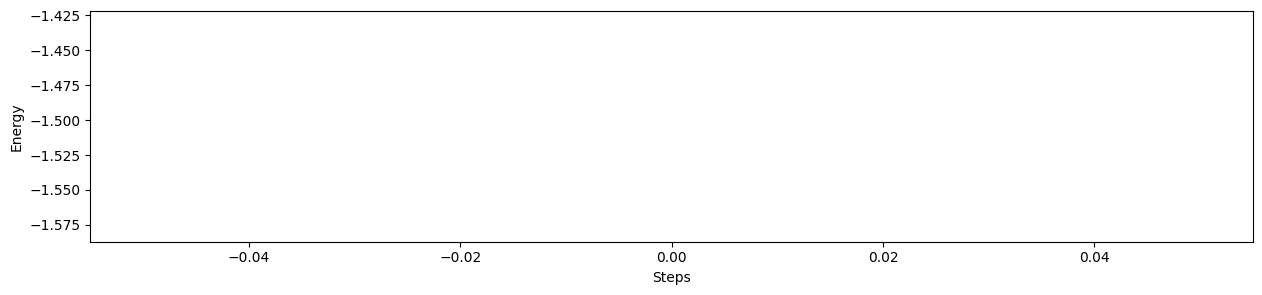

In [13]:
#A red line will be placed at the indicated number of steps in the input file
sim.analysis.plot_energy()

In [ ]:
sim.analysis.view_last()

<font size='3'><font color='black'>To continue a previously run simulation for more steps without overriding previous files for a set amount of steps:</font>

In [ ]:
sim.oxpy_run.process.terminate()

In [ ]:
#sim = Simulation(file_dir, sim_dir)
sim.oxpy_run.run(continue_run=1e5)

<font size='3'><font color='black'>To add external forces or observables we can use the Force and Observable class with the add_force and add_observable methods.sim.oxpy_run.process.terminate()</font>

In [14]:
sim.oxpy_run.process.terminate()

In [56]:
from oxdna_simulation import Force, Observable
#The external forces will pull on the long edges of our rectangle to a distance of 30 sim untis.
com_list = '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829'
ref_list = '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446'

f = Force()
com_force_1 = f.com_force(
    com_list=com_list,                        
    ref_list=ref_list,                        
    stiff='0.2',                        
    r0='30',                         
    PBC='1',                         
    rate='0'
)
com_force_2 = f.com_force(
    com_list=ref_list,                        
    ref_list=com_list,                        
    stiff='0.2',                        
    r0='30',                         
    PBC='1',                         
    rate='0'
)

#The observable will save the distance between the center of mass of
#the com_list and ref_list to a file named com_distance.txt every 1e5 steps.
obs = Observable()
com_distance = obs.distance(
    particle_1=com_list,
    particle_2=ref_list,
    print_every='1e4',
    name='com_distance.txt',
    PBC='1'
)

com_distance_1 = obs.distance(
    particle_1='1,2,3,4,5',
    particle_2='20,30,40,45',
    print_every='1e4',
    name='com_distance.txt',
    PBC='1'
)

sim.build(clean_build='force')
# sim.add_force(com_force_1)
# sim.add_force(com_force_2)
sim.add_observable(com_distance)
sim.add_observable(com_distance_1)


In [49]:
com_distance['output']['cols'][0]

{'type': 'distance',
 'particle_1': '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829',
 'particle_2': '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,34

In [52]:
com_distance_1

{'output': {'print_every': '1e4',
  'name': 'com_distance_2.txt',
  'cols': [{'type': 'distance',
    'particle_1': '1,2,3,4,5',
    'particle_2': '20,30,40,45',
    'PBC': '1'},
   {'type': 'distance',
    'particle_1': '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,

In [50]:
com_distance_1['output']['cols'].append(com_distance['output']['cols'][0])

In [8]:
sim.build_sim.force_cache

In [ ]:
sim.input_file({'steps':'1e7', 'print_conf_interval':'5e5'})
sim.oxpy_run.run()

Running: single_rro_sim_1


Run time: 0.0539869200438261
Exception encountered in /scratch/matthew/ipy_oxDNA/ipy_oxdna_examples/rro/single_rro_sim_1:
str: Traceback (most recent call last):
  File "/scratch/matthew/ipy_oxDNA/src/oxdna_simulation.py", line 442, in run_complete
    manager = oxpy.OxpyManager(ox_input)
oxpy.core.OxDNAError: Can't read external_forces_file 'forces.json'



In [ ]:
sim.analysis.plot_observable(com_distance)

In [ ]:
sim.analysis.view_last()

In [ ]:
sim.oxpy_run.process.terminate()

<font size='6'><a class="anchor" id="2"></a> <h2 align="center"> <font color='black'>Run Multiple Simulations in Parallel.</font></h2> 

<font size='3'><font color='black'>The SimulationManager class enable us to queue multiple simulations to be run in parallel. The simulation manager takes advantage of the nvidia-cuda-mps-server daemon to run multiple oxDNA simulation per GPU.</font>
    
<font size='3'><font color='black'>Each simulation will occupy a CPU core and a certain amount of GPU memory. You can run #cores - 1 simulations in parallel, unless GPU memory is near full. Simulation processes will be allocated to the GPU with the most avalible memory until all GPU memory is near full or #cores - 1 are being run. Once a simulation has finished, additional queued simulations will be allocated to be run. You can queue as many simulations as you desire.</font>

In [ ]:
from oxdna_simulation import Simulation, SimulationManager
import os

<font size='3'><font color='black'>You can run multiple replicas of a single system with diffrent parameters. (i.e. temperatures)</font>

In [ ]:
sim_manager = SimulationManager()
#sim_manager.restart_nvidia_cuda_mps_control() 
# kwargs: pipe='$SLURM_TASK_PID'
# If  env var $SLURM_TASK_PID does not exist, any string will do.
# This will create files in /tmp/mps-pipe_{pipe} and /tmp/mps-log_{pipe}
# which will manage cuda job allocations

path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/rro'
temperatures = ['20C', '25C', '30C']
sim_dir_list = [f'{file_dir}/rro_{temp}' for temp in temperatures]

sim_list = [Simulation(file_dir, sim_dir) for sim_dir in sim_dir_list]

sim_parameters = [{'T':temp, 'steps':'1e7'} for temp in temperatures]
for sim_parameters, sim in zip(sim_parameters, sim_list):
    sim.build(clean_build='force')
    sim.input_file(sim_parameters)
    sim_manager.queue_sim(sim)

In [ ]:
sim_manager.run()

In [ ]:
for sim in sim_list:
    sim.analysis.view_last()

In [ ]:
#currently does not work
sim_manager.terminate_all()

<font size='3'><font color='black'>Alternatively you can run multiple diffrent systems in parallel.</font>

In [ ]:
sim_manager = SimulationManager()

path = os.path.abspath('../ipy_oxdna_examples')
systems = ['180', '340', '446', '514', '617']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/{sys}_sys_example' for sys, file_dir in zip(systems, file_dir_list)]
sim_list = [Simulation(file_dir, sim_dir) for sim_dir, file_dir in zip(sim_dir_list, file_dir_list)]

sim_parameters = {'steps':'1e5', 'T':'20C', 'print_energy_every': '5e4', 'print_conf_interval':'5e4'}
for sim in sim_list:
    sim.build(clean_build='force')
    sim.input_file(sim_parameters)
    sim_manager.queue_sim(sim)

In [ ]:
sim_manager.run(gpu_mem_block=False)

<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Umbrella Sampling</font></h2> 

<font size='3'><font color='black'>Utilizing the ComUmbrellaSampling class, we can automatically run 1D umbrella sampling simulations with a COM order parameter.</font>

In [ ]:
from umbrella_sampling import ComUmbrellaSampling
from oxdna_simulation import SimulationManager
import os

In [ ]:
path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/rro'
system = 'rro_umbrella'

com_list = '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829'
ref_list = '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446'
xmin = 0
xmax = 72.787
n_windows = 100

stiff = 0.2


equlibration_parameters = {'steps':'1e7', 'T':'20C', 'print_energy_every': '1e6', 'print_conf_interval':'1e7'}
production_parameters = {'steps':'2e7', 'T':'20C', 'print_energy_every': '2e7', 'print_conf_interval':'2e7'}

us = ComUmbrellaSampling(file_dir, system)
simulation_manager = SimulationManager()

In [ ]:
us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters, observable=False)

In [ ]:
simulation_manager.run()

In [ ]:
us.build_production_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, production_parameters, observable=True, print_every=1e4, name='com_distance.txt')
simulation_manager.run()

In [ ]:
wham_dir = os.path.abspath('../wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '30'
us.wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

In [ ]:
us.plot_free()

<font size='6'><a class="anchor" id="4"></a> <h2 align="center"> <font color='black'>Multiple Umbrella Sampling Systems</font></h2> 

<font size='3'><font color='black'>Utilizing the ComUmbrellaSampling class, we can automatically run 1D umbrella sampling simulations with a COM order parameter.</font>

In [ ]:
simulation_manager = SimulationManager()
simulation_manager.restart_nvidia_cuda_mps_control()

In [ ]:
from umbrella_sampling import ComUmbrellaSampling
from oxdna_simulation import SimulationManager
import os

In [ ]:
path = os.path.abspath('../ipy_oxdna_examples')
system_name = ['rro', 't9', 't20']
file_dirs = [f'{path}/{sys}' for sys in system_name]
systems = [f'{sys}_umbrella' for sys in system_name]

coms_list = ['63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829',
            '175,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,6847,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6753',
            '103,197,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,6870,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6847,6848,6849,6850,6851,6852,6853,6854,6855,6856,6857,6858,6859,6860,6861,6862,6863,6864,6865,6866,6867,6868,6869'
           ]
            
refs_list = ['3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446',
            '3472,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3473,3557,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3558,3559',
            '3392,3580,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3581'
           ]
            

stiff = 0.2
xmin = 0
xmax = 72.787
n_windows = 100

equlibration_parameters = {'steps':'1e7', 'print_energy_every': '1e6', 'print_conf_interval':'1e7'}
production_parameters = {'steps':'2e7', 'print_energy_every': '2e7', 'print_conf_interval':'2e7'}

us_list = [ComUmbrellaSampling(file_dir, sys) for file_dir, system in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

In [ ]:
for us in us_list:
    us.build_equlibration_runs(simulation_manager, windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters, observable=False)
simulation_manager.run()

for us in us_list:
    us.build_production_runs(simulation_manager, windows, com_list, ref_list, stiff, xmin, xmax, production_parameters, observable=True, print_every=1e4, name='com_distance.txt')
simulation_manager.run()